In [1]:
import matplotlib.pyplot as plt
import yfinance as yf
import pandas as pd
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
import datetime
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Fetching TCS stock data
tickerSymbol = "TCS.NS"
data = yf.Ticker(tickerSymbol)

In [3]:
end_date = datetime.date.today()
start_date = end_date - datetime.timedelta(days=730)
prices = data.history(start=start_date, end=end_date)['Close']

In [4]:
print(prices.head())

Date
2022-12-19 00:00:00+05:30    3109.679688
2022-12-20 00:00:00+05:30    3150.371094
2022-12-21 00:00:00+05:30    3174.261230
2022-12-22 00:00:00+05:30    3165.666748
2022-12-23 00:00:00+05:30    3135.220947
Name: Close, dtype: float64


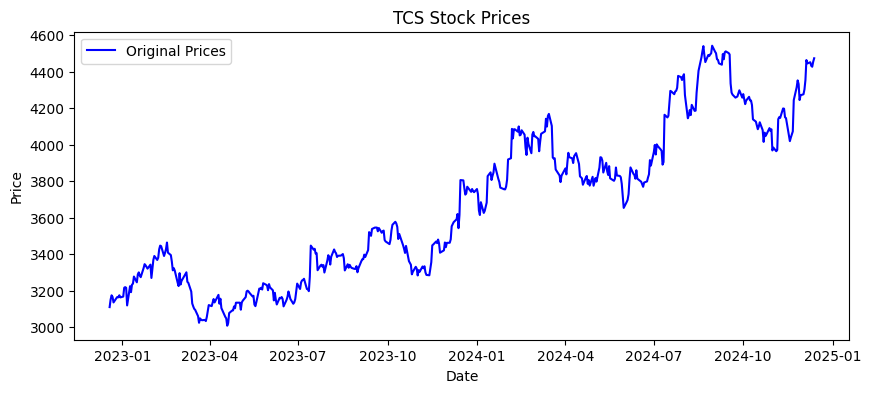

In [5]:
# Plot the original prices
plt.figure(figsize=(10, 4))
plt.plot(prices, label='Original Prices', color='blue')
plt.title("TCS Stock Prices")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [6]:
# Perform first-order differencing
diff_prices = prices.diff().dropna()


In [7]:
# ADF Test for stationarity
adf_result = adfuller(diff_prices)
print("ADF Test Statistic:", adf_result[0])
print("p-value:", adf_result[1])

# Check stationarity based on p-value
if adf_result[1] <= 0.05:
    print("The data is stationary (p-value <= 0.05).")
else:
    print("The data is not stationary (p-value > 0.05).")

ADF Test Statistic: -21.146106333447644
p-value: 0.0
The data is stationary (p-value <= 0.05).


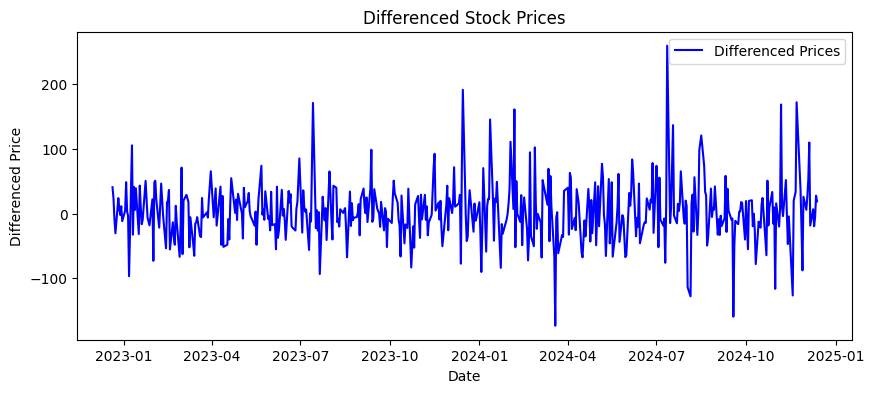

In [8]:
# Plot the first-order differenced prices
plt.figure(figsize=(10, 4))
plt.plot(diff_prices, label='Differenced Prices', color='blue')
plt.title("Differenced Stock Prices")
plt.xlabel("Date")
plt.ylabel("Differenced Price")
plt.legend()
plt.show()

In [41]:
#BUILDING THE MODEL FOR ARIMA
model =ARIMA(prices,order=(2,1,4))
fitted = model.fit()
print(fitted.summary())

                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  490
Model:                 ARIMA(2, 1, 4)   Log Likelihood               -2558.108
Date:                Mon, 16 Dec 2024   AIC                           5130.215
Time:                        23:50:18   BIC                           5159.562
Sample:                             0   HQIC                          5141.742
                                - 490                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.4041      0.012    116.350      0.000       1.380       1.428
ar.L2         -0.9834      0.012    -84.298      0.000      -1.006      -0.961
ma.L1         -1.3828      0.049    -28.429      0.0

In [42]:

# Forecast the next 10 days
forecast_steps = 10
forecast = fitted_model.forecast(steps=forecast_steps)
forecast_dates = [end_date + datetime.timedelta(days=i) for i in range(1, forecast_steps + 1)]


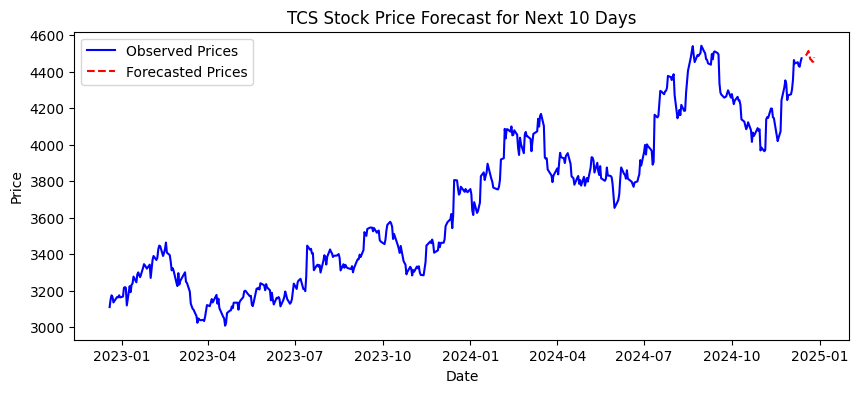

In [43]:
# Plot observed prices and forecast
plt.figure(figsize=(10, 4))
plt.plot(prices, label='Observed Prices', color='blue')
plt.plot(forecast_dates, forecast, label='Forecasted Prices', color='red', linestyle='--')
plt.title("TCS Stock Price Forecast for Next 10 Days")
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend()
plt.show()

In [12]:
# Print forecasted values
forecast_df = pd.DataFrame({'Date': forecast_dates, 'Forecasted Price': forecast.values})
print(forecast_df)

         Date  Forecasted Price
0  2024-12-17       4484.371703
1  2024-12-18       4469.152642
2  2024-12-19       4466.967405
3  2024-12-20       4470.207317
4  2024-12-21       4457.804300
5  2024-12-22       4456.415917
6  2024-12-23       4468.534274
7  2024-12-24       4460.456423
8  2024-12-25       4453.317022
9  2024-12-26       4463.763404
